<a href="https://colab.research.google.com/github/JLaura011/Business-Analytics/blob/master/Segmentaci%C3%B3n_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mineria de datos para una empresa de retail: Una aplicación de la matriz RFM para la segmentación de clientes**

Presentado por: Jesús Alberto Laura Balbin

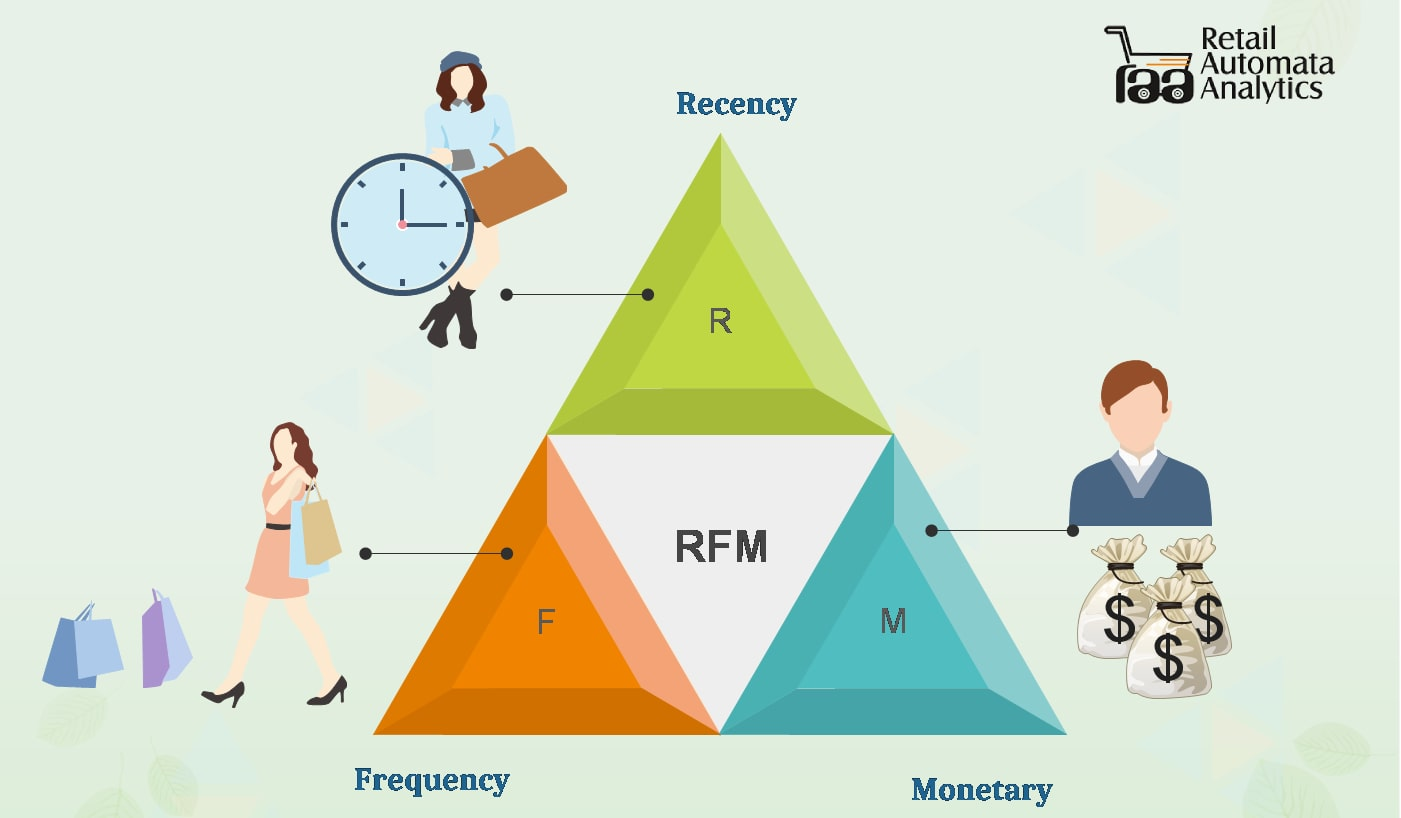

#**1. Introduccion**

El presente trabajo utiliza una base de datos del sector retail para realizar la construcción de la matriz RFM con el fin de poder identificar el grupo de clientes que generan un gran valor a la empresa.

#**2. Base de Datos**

Debido a que no fue posible obtener la data, se utilizo la data libre que se encuentra en el siguiente enlace https://archive.ics.uci.edu/ml/datasets/Online+Retail la cual contiene informacion de compras de clientes de una empresa de retail.

**Conjunto de Variables del Dataset**

*   **InvoiceNo**: Número de factura. Variable del tipo nominal, que muestra un número integral de 6 dígitos asignado de forma exclusiva a cada transacción. Si este código comienza con la letra C, indica una cancelación o que la transaccion no se concreto.
*  **StockCode**: Código de producto (artículo). Variable del tipo nominal, que muestra un número integral de 5 dígitos asignado de forma única a cada producto.
*   **Description**: Nombre del producto (artículo). Variable del tipo nominal
*   **Quantity**: Cantidad comprada por cada producto en cada transaccion. Variable del tipo númerico.
*   **InvoiceDate**: Fecha y hora de la factura. Variable del tipo numérico, que muestra el día y la hora en que se generó cada transacción.
*   **UnitPrice:** Precio unitario. Variable del tipo numérico, que muestra el precio del producto por unidad en libras esterlinas.
*   **CustomerID** Número de cliente (ID del cliente). Variable del tipo nominal, que muestra un número integral de 5 dígitos asignado de forma exclusiva a cada cliente.
*   **Country** Nombre del País, Variable del tipo nominal que muestra el nombre del país en el que reside cada cliente.

#**3. Preprocesamiento de los Datos**

In [ ]:
#Importamos librerías
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime as dt
import os
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Leemos el archivo y lo cargamos a traves de DRIVE
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importamos los datos
ROOT_PATH = "/content/drive/My Drive/RFM"
DATA_PATH = os.path.join(ROOT_PATH, "Retail.xlsx")

retail_df = pd.read_excel(DATA_PATH)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Verificamos el tamaño de nuestro data set
print("El tamaño de nuestro data set es: ", retail_df.shape)

El tamaño de nuestro data set es:  (541909, 8)


In [ ]:
#Verificamos ello a través de los comandos head() and tail()
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Hacemos un resumen de la info del dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB



Nuestro conjunto de datos se compone de 541909 filas y 8 columnas. Al revisar las columnas, notamos que tenemos algunos valores faltantes en la columna CustomerID, ya que solo tiene 406829 valores. Además, la columna Descripción (Description) tiene valores perdidos. Estas caracteristicas encontradas debe tenerse en cuenta al aplicar la exploración a nuestro conjunto de datos.

In [ ]:
#Explorando los valores unicos para cada columna o variable de la base de datos
print("Numero de transacciones: ", retail_df['InvoiceNo'].nunique())
print("Numero de productos: ",retail_df['StockCode'].nunique())
print("Numero de clientes:", retail_df['CustomerID'].nunique() )
print("% de clientes con un valor NA: ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )
print('Numero de Paises: ',retail_df['Country'].nunique())

Numero de transacciones:  25900
Numero de productos:  4070
Numero de clientes: 4372
% de clientes con un valor NA:  24.93 %
Numero de Paises:  38


**Warning: Un resultado interesante es que el numero de consumidores con un valor NA es alto (24.93%) lo cual podria tener un impacto en nuestros modelos de regresión y/o inferencias**

In [ ]:
#Analizemos un poco mas de nuestras variables numericas (Cantidad y Precio)
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Lo primero que debemos notar es que tenemos algunos valores negativos en nuestro conjunto de datos. Quizás, esto podría significar que estas cantidades (con los valores de UnitPrice correspondientes) fueron devueltas, canceladas o que hubo un error al ingreso de los datos.

# 3.1. Facturas Canceladas

Como se menciono en el punto 02, en la descripción del conjunto de datos, algunos InvoiceNo comienzan con la letra "c" los cuales fueron cancelados. Comprobemos ello con la cantidad negatica de -80995 (Quantity min). Para ello, buscaremos el listado de facturas canceladas y comprobaremos si existe una factura con esa cantidad.

In [ ]:
#Obteniendo las transacciones canceladas
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
#Busquemos la transaccion donde la cantidad es -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [ ]:
#Verifiquemos si hay cantidades positivas para las facturas canceladas
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Como esperábamos, los valores negativos en la columna Quantity significan que son cantidades canceladas porque no encontramos ningún valor positivo para los pedidos donde InvoiceNo contiene la letra C.

**Del analisis establecido surge la siguiente interrogante ¿Cuantas Ordenes fueron canceladas?**

In [ ]:
#Verificamos cuantas filas de nuestro dataframe contienen ordenes canceladas
print("Tenemos ",len(cancelled_orders), " ordenes canceladas.")
#Porcentaje de ordenes canceladas comparadas con el total de ordeses
total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Porcentaje de Ordenes Canceladas: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

Tenemos  9288  ordenes canceladas.
Porcentaje de Ordenes Canceladas: 9288/25900 (35.86%) 


Tenemos un gran porcentaje de pedidos cancelados 35%. De dicho resultado se sugiere el estudio de estos pedidos cancelados, ya que puede ayudar a prevenir cancelaciones futuras.

# 3.2. Pedidos (Basket)

# 3.2.1.Promedio de ordenes por cliente

In [ ]:
#Obteniendo los valores unicos de InvoiceNo por cliente
groupby_customers = pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [ ]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


El número promedio de pedidos por cliente es de 5. Como encontramos en las estadísticas descriptivas, los clientes compran en promedio una cantidad de 10. De ello surge la interrogante¿Son del mismo producto? Examinemos cuántos productos se compran.

# 3.2.2. Promedio de artículos unicos por ordenes

In [ ]:
groupby_invoice = pd.DataFrame(retail_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['Numero de Productos']
groupby_invoice.head()

,Numero de Productos
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [ ]:
groupby_invoice.describe()

,Numero de Productos
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [ ]:
retail_df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()

count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

In [ ]:
temp_df =retail_df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Numero de Productos'})
transaction_df.head()

,InvoiceNo,CustomerID,Numero de Productos
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [ ]:
transaction_df.describe()

,CustomerID,Numero de Productos
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


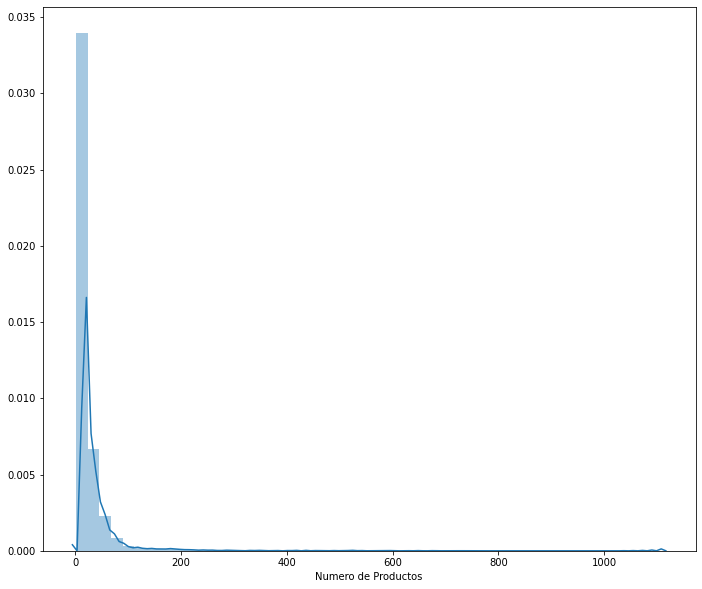

In [ ]:
#Visualizemos el analisis mediante un gráfico
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(groupby_invoice['Numero de Productos'],ax=ax)
plt.show()

# 3.3. Clientes por País

In [ ]:
#Incluyamos la variable costo total
retail_df['total_cost'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


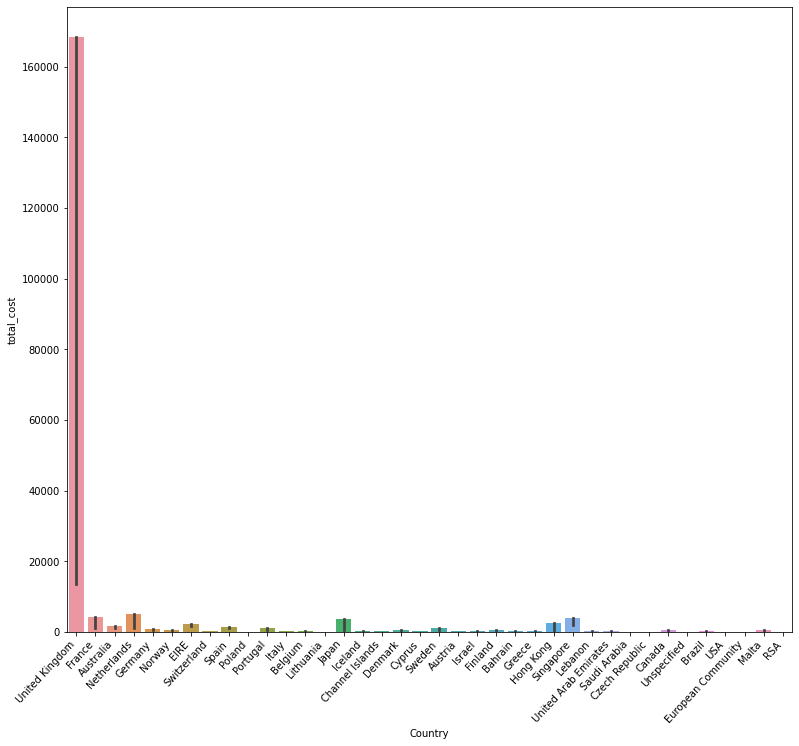

In [ ]:
#Incluyendo la variable costo total desde la vista del consumidor, podemos calcular el ingreso total por región
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [ ]:
#Veamos lo obtenido en el gráfico a traves de una tabla
retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False,)

,Quantity,UnitPrice,CustomerID,total_cost
Country,,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06
Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05
Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05
France,110480,4.303199e+04,1.076489e+08,1.974039e+05
Australia,83653,4.054750e+03,1.569300e+07,1.370773e+05
Switzerland,30325,6.813690e+03,2.377592e+07,5.638535e+04
Spain,26824,1.263345e+04,3.268929e+07,5.477458e+04
Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04


Como podemos ver, el mercado más grande es el que se encuentra en Reino Unido.

In [ ]:
retail_df[retail_df['Country']=='United Kingdom']['CustomerID'].nunique()

3950

Por lo tanto, podemos concluir que no solo la mayoría de los ingresos por ventas se obtienen en el Reino Unido, sino que también la mayoría de los clientes se encuentran allí. Podemos explorar esto para encontrar más sobre qué productos compran los clientes juntos y qué posibles oportunidades futuras en el mercado del Reino Unido.

In [ ]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.describe()

,Quantity,UnitPrice,CustomerID,total_cost
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [ ]:
#Obteniendo algunos insights para el Reino Unido
print("Numero de transacciones: ", retail_uk['InvoiceNo'].nunique())
print("Numero de productos comprados: ",retail_uk['StockCode'].nunique())
print("Numero de clientes:", retail_uk['CustomerID'].nunique() )
print("% de clientes con un valor NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )

Numero de transacciones:  23494
Numero de productos comprados:  4065
Numero de clientes: 3950
% de clientes con un valor NA:  26.96 %


# 3.4. Cantidad

In [ ]:
#Una vez identificado nuestro mercado target (UK) exploremos ¿Cuáles son los productos que más se compran en UK?
groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
1068,22197,52928
2620,84077,48326
3655,85099B,43167
3666,85123A,36706
2733,84879,33519
1451,22616,25307
375,21212,24702
1049,22178,23242
39,17003,22801
887,21977,20288


In [ ]:
invoice_quantity= retail_uk.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


Es importante saber más sobre los productos mas comprados. ¿Hay algún producto que cuando se compra uno de ellos también se compra el otro? Para obtener una respuesta a la interrogrante, haremos un"Market Basket Analysis" o "Análisis de la cesta de la compra" para encontrar qué productos tienden a comprarse juntos y así poder identificar cuáles son más susceptibles de promoción. Lo antes mencionado se desarrollara en la siguiente sección

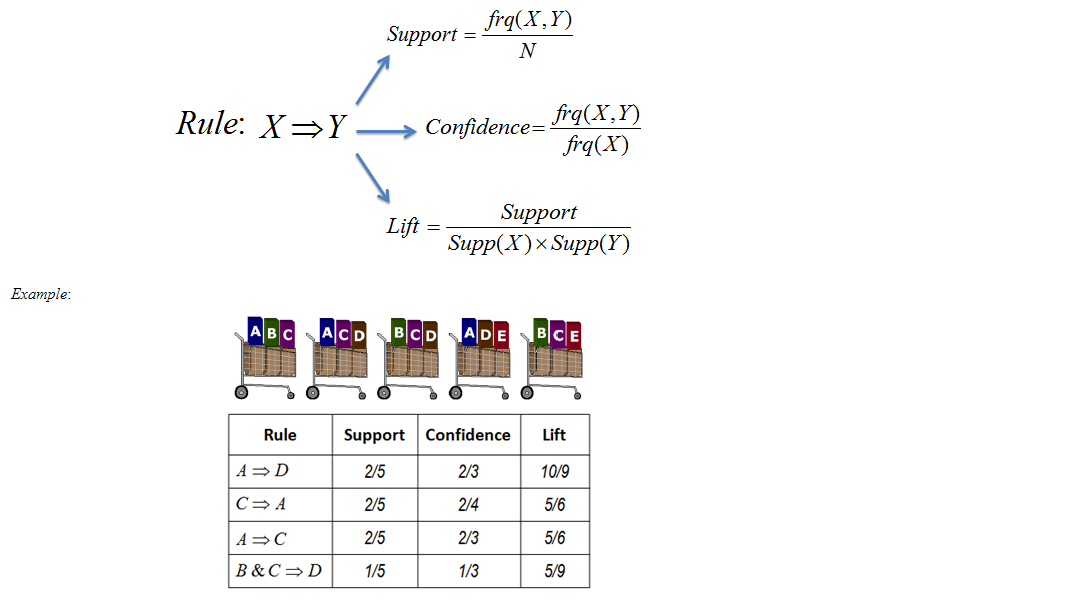

#  #4. Market Basket Analysis

El Análisis de la Cesta de Mercado o "Market Basket Analysis" es una de las técnicas clave utilizadas en la industria retail para descubrir asociaciones entre artículos.Funciona buscando combinaciones de elementos que ocurren juntos con frecuencia en las transacciones. En otras palabras, permite a los minoristas identificar las relaciones entre los artículos que la gente compra.
Las reglas de asociación se utilizan ampliamente para analizar la cesta minorista o los datos de transacciones, y están destinadas a identificar reglas sólidas descubiertas en los datos de transacciones utilizando medidas de interés, basadas en el concepto de reglas sólidas.

In [ ]:
#Importamos algunos librerias necesarias
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 4.1. Limpieza de la Base de Datos

In [ ]:
#Eliminamos espacios adicionales en la variable Description
retail_df['Description'] = retail_df['Description'].str.strip()
#Eliminamos valores perdidos
retail_df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
#Eliminamos ordenes canceladas
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

Después de la limpieza, necesitamos consolidar los artículos en 1 transacción por fila con cada producto. Para ejemplificar ello eligamos el caso del pais de Francia

# 4.2. Funcion para las Reglas de Asociación

In [ ]:
basket = (retail_df[retail_df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HOOK HANGER MAGIC GARDEN,3 PIECE SPACEBOY COOKIE CUTTER SET,3 RAFFIA RIBBONS 50'S CHRISTMAS,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN RED AND CREAM,3 TRADITIONAl BISCUIT CUTTERS SET,36 DOILIES DOLLY GIRL,36 DOILIES VINTAGE CHRISTMAS,36 FOIL HEART CAKE CASES,36 FOIL STAR CAKE CASES,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF DOG STICKERS,3D TRADITIONAL CHRISTMAS STICKERS,3D VINTAGE CHRISTMAS STICKERS,4 IVORY DINNER CANDLES SILVER FLOCK,4 PINK DINNER CANDLE SILVER FLOCK,4 TRADITIONAL SPINNING TOPS,5 HOOK HANGER MAGIC TOADSTOOL,5 HOOK HANGER RED MAGIC TOADSTOOL,50'S CHRISTMAS GIFT BAG LARGE,6 GIFT TAGS 50'S CHRISTMAS,...,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND LARGE BLUE FELT HEART,WOODLAND LARGE PINK FELT HEART,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND PARTY BAG + STICKER SET,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WOODLAND STORAGE BOX LARGE,WOODLAND STORAGE BOX SMALL,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP 50'S CHRISTMAS,WRAP ALPHABET DESIGN,WRAP CAROUSEL,WRAP CHRISTMAS VILLAGE,WRAP CIRCUS PARADE,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP GINGHAM ROSE,WRAP GREEN PEARS,WRAP I LOVE LONDON,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Hay muchos ceros en los datos, por lo que debemos asegurarnos de que los valores positivos se conviertan a 1 y que cualquier valor menor al 0 se establezca en 0.

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

Creemos nuestra funcion para el calculo de la matriz de reglas de asociación

In [ ]:
def create_basket(country_filter):
    basket = (retail_df[retail_df['Country'] == country_filter]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
    return basket

# 4.2.1. Reglas de Asociación para el País: Francia

In [ ]:
country_filter = "France"
basket_french = create_basket("France")
basket_sets = basket_french.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135


De acuerdo con los resultados, un cliente tiene 7 veces más probabilidades de comprar un reloj despertador colo rosa que si un cliente promedio (lift) compra un reloj despertador color verde. Esta regla es "verdadera" en el 77% de los casos (confidence). Esto se puede utilizar como información para recomendar ALARM CLOCK BAKELIKE PINK para aquellos que compraron el color verde.

# 4.2.2. Reglas de Asociación para el País: Germany

In [ ]:
#Ten en cuenta que la estructura de los datasets es como siguiente:
# basket_"name of country" / basket"i"_sets y basket"i"_sets.drop donde "i" representa el df que se esta creando
basket_germany = create_basket("Germany")
basket2_sets = basket_germany.applymap(encode_units)
basket2_sets.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
frequent_itemsets_germany = apriori(basket2_sets, min_support=0.05, use_colnames=True)

In [ ]:
rules = association_rules(frequent_itemsets_germany, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(PLASTERS IN TIN CIRCUS PARADE),0.157549,0.115974,0.050328,0.319444,2.754455,0.032057,1.298977
3,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF 4 FRUITS),0.115974,0.157549,0.050328,0.433962,2.754455,0.032057,1.488330
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN CIRCUS PARADE),0.245077,0.115974,0.056893,0.232143,2.001685,0.028470,1.151290


Según los resultados, un cliente tiene 4 veces más probabilidades de comprar PLASTERS IN TIN WOODLAND ANIMALS que si un cliente medio compra PLASTERS IN TIN CIRCUS PARADE (lift). Esta regla es "verdadera" en el 42% de los casos (confidence). 

# 4.2.3. Reglas de Asociación para el País donde existen mas ventas: UK

In [ ]:
basket_uk = create_basket("United Kingdom")
basket3_sets = basket_uk.applymap(encode_units)
basket3_sets.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
frequent_itemsets_uk = apriori(basket3_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.8)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


Como no encontramos ninguna regla para los clientes del Reino Unido. Intentaremos calcularla de otra forma.

In [ ]:
retail_filtered = retail_df[retail_df['Country']=="United Kingdom"]

In [ ]:
basket = (retail_filtered[retail_filtered['Quantity']<10]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
basket4_sets = basket.applymap(encode_units)
basket4_sets.drop('POSTAGE', inplace=True, axis=1)

In [ ]:
frequent_itemsets_uk = apriori(basket3_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.5)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.046928,0.049821,0.030160,0.642694,12.900183,0.027822,2.659288
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049821,0.046928,0.030160,0.605376,12.900183,0.027822,2.415142
2,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050035,0.037660,0.030910,0.617773,16.403939,0.029026,2.517719
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037660,0.050035,0.030910,0.820768,16.403939,0.029026,5.300203
4,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.050035,0.051267,0.037553,0.750535,14.639752,0.034988,3.803076


In [ ]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.03766,0.050035,0.03091,0.820768,16.403939,0.029026,5.300203


In [ ]:
basket['PINK REGENCY TEACUP AND SAUCER'].sum()

2291.0

In [ ]:
basket['GREEN REGENCY TEACUP AND SAUCER'].sum()

3131.0

Por ejemplo, podemos ver que vendemos 3131 GREEN REGENCY TEACUP AND SAUCER, pero solo 2291 PINK REGENCY TEACUP AND SAUCERs, por lo que tal vez podamos impulsar más ventas de relojes de GREEN REGENCY TEACUP a través de recomendaciones.

# #5. Matriz RFM

De acuerdo con Chen et al. (2012), el análisis RFM (Recency, Frequency, Monetary) es un enfoque basado en el comportamiento de agrupar clientes en segmentos. Agrupa a los clientes en función de sus transacciones de compra anteriores, es decir, qué tan recientemente, con qué frecuencia y cuánto compró un cliente.

RFM segmenta a los clientes en varios grupos o grupos y ayuda a los gerentes a identificar segmentos más importantes / rentables para enfocar su atención y esfuerzo. También ayuda a los especialistas en marketing a identificar a los clientes que tienen más probabilidades de responder a las promociones y también a los servicios de personalización futuros.

*   Recency (R): ¿Quién ha comprado recientemente? Significa el número de días desde la última compra (menos reciente es mejor)
*   Frecuency (F): ¿Quién ha comprado con frecuencia? Significa el número total de compras. (alta frecuencia es mejor)
*   Monetized (M): ¿Quién tiene un alto monto de compra? Significa el dinero total gastado por el cliente (mejor monetario es mejor)

El análisis RFM se basa en el principio de Pareto de que el 80% de su negocio proviene del 20% de sus clientes.

# 5.1. Preparación de la Data

Como los grupos de clientes pueden variar según la geografía, se calculara la matriz RFM para los clientes del Reino Unido, ya que en dicho pais, se encuentra la mayoría de datos de nuestros clientes.

In [ ]:
#Cargamos nuevamente nuestra base de datos
ROOT_PATH = "/content/drive/My Drive/RFM"
DATA_PATH = os.path.join(ROOT_PATH, "Retail.xlsx")

retail_df = pd.read_excel(DATA_PATH)

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Utilizamos el filtro para el pais de UK
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.shape

(495478, 8)

In [ ]:
#Eliminamos las ordenes canceladas
retail_uk = retail_uk[retail_uk['Quantity']>0]
retail_uk.shape

(486286, 8)

In [ ]:
#Eliminamos las columnas con NA de CustomerID
retail_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
retail_uk.shape

(354345, 8)

In [ ]:
#Restrinjimos los datos a un año completo porque es mejor usar una métrica por meses o años en RFM
retail_uk = retail_uk[retail_uk['InvoiceDate']>= "2010-12-09"]
retail_uk.shape

(342478, 8)

In [ ]:
print("Resumen..")
#Comprobamos los resultados obtenidos
print("Numero de transacciones: ", retail_uk['InvoiceNo'].nunique())
print("Numero de productos comprados: ",retail_uk['StockCode'].nunique())
print("Numero de clientes:", retail_uk['CustomerID'].nunique() )
print("% de clientes con un valor NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )

Resumen..
Numero de transacciones:  16017
Numero de productos comprados:  3611
Numero de clientes: 3863
% de clientes con un valor NA:  0.0 %


# 5.2. Recency (R)

Para calcular la columna recency (R), debemos elegir un punto de fecha a partir del cual evaluamos cuántos días atrás fue la última compra del cliente.

In [ ]:
#Ultima fecha disponible en nuestro conjunto de datos y utilicemos esta fecha como target
retail_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [ ]:
retail_uk['InvoiceDate'].min()

Timestamp('2010-12-09 08:34:00')

In [ ]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [ ]:
#Creamos una nueva columna llamada fecha la cual contendra solo la fecha de la factura
retail_uk['date'] = retail_uk['InvoiceDate'].dt.date
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,2010-12-09
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom,2010-12-09
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom,2010-12-09
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,2010-12-09
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,2010-12-09


In [ ]:
#Agrupamos por cliente y verificamos la ultima fecha de compra
recency_df = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()


,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [ ]:
#Calculamos la columna Recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [ ]:
#Eliminaremos la columna LasPurshaceDate ya que no la utilizaremos
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()


,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


# 5.3. Frequency (F)

In [ ]:
# Eliminamos DUplicados
retail_uk_copy = retail_uk
retail_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
# Calculamos la frecuencia de compra con el comando count
frequency_df = retail_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,196
3,12749.0,5
4,12820.0,4


# 5.4. Monetized (M)

In [148]:
#Volvemos a crear la columna costo total
retail_uk['TotalCost'] = retail_uk['Quantity'] * retail_uk['UnitPrice']

In [149]:
monetary_df = retail_uk.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,658.89
2,12748.0,3739.23
3,12749.0,98.35
4,12820.0,58.20


# 5.5. Creamos la Matriz RFM

In [150]:
#Fucionamos nuestras tablas F+R
temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,10
2,12748.0,0,196
3,12749.0,3,5
4,12820.0,3,4


In [151]:
#Unimos la tabla FR con M
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
#Usamos Customer ID como indice
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,658.89
12748.0,0,196,3739.23
12749.0,3,5,98.35
12820.0,3,4,58.20


# # 6. Segmentacion de clientes utilizando la matriz RFM

La forma más sencilla de crear segmentos de clientes a partir del modelo RFM es utilizar Quartiles. Asignamos una puntuación de 1 a 4 a Actualidad, Frecuencia y Monetaria. Cuatro es el valor mejor / más alto y uno es el valor más bajo / peor. Una puntuación RFM final se calcula simplemente combinando números de puntuación RFM individuales.

In [152]:
#Obteniendo los cuartiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles


,Recency,Frequency,Monetary
0.25,17.0,1.0,17.4
0.50,49.0,2.0,45.0
0.75,134.0,5.0,121.6


In [137]:
quantiles.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.4, 0.5: 45.0, 0.75: 121.6},
 'Recency': {0.25: 17.0, 0.5: 49.0, 0.75: 134.0}}

In [138]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [139]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [140]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,10,658.89,4,4,4
12748.0,0,196,3739.23,4,4,4
12749.0,3,5,98.35,4,3,3
12820.0,3,4,58.20,4,3,3


Ahora que tenemos la puntuación de cada cliente, podemos representar nuestra segmentación de clientes.
Primero, necesitamos combinar las puntuaciones (R_Quartile, F_Quartile, M_Quartile) juntas.

In [141]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12747.0,2,10,658.89,4,4,4,444
12748.0,0,196,3739.23,4,4,4,444
12749.0,3,5,98.35,4,3,3,433
12820.0,3,4,58.20,4,3,3,433


Mejor puntuación reciente = 4: compra más reciente. Mejor puntuación de frecuencia = 4: mayor cantidad de compra. Mejor puntuación monetaria = 4: gastado más

In [142]:
#Veamos quiénes son nuestros Campeones (mejores clientes).
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,57,39646.45,4,4,4,444
17949.0,1,44,28685.69,4,4,4,444
17450.0,8,44,25953.51,4,4,4,444
16013.0,3,45,17163.28,4,4,4,444
16333.0,7,22,14418.96,4,4,4,444
15769.0,7,25,11660.84,4,4,4,444
12901.0,8,28,9230.45,4,4,4,444
13798.0,1,56,7786.26,4,4,4,444
16684.0,4,28,7700.08,4,4,4,444


In [171]:
#Realizemos una segmentacion utilizando los scores de FRM
print("Mejores clientes: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Clientes Leales: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Grandes Gastadores: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Casi Perdido: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Cliente Perdido: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Clientes Baratos Perdidos: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Mejores clientes:  356
Clientes Leales:  752
Grandes Gastadores:  966
Casi Perdido:  64
Cliente Perdido:  9
Clientes Baratos Perdidos:  353


# 6.1. Segmentos de clientes definidos por el departamento de marketing de la empresa

In [157]:
#Realizemos una suma de los score obtenidos de las tablas R,F,M
rfm_segmentation['RFM_Score'] = rfm_segmentation[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
print(rfm_segmentation['RFM_Score'].head())

CustomerID
12346.0     6
12747.0    12
12748.0    12
12749.0    10
12820.0    10
Name: RFM_Score, dtype: int64


In [159]:
# Definimos nos niveles RFM segun la reglas de negocio de la empresa
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
rfm_segmentation['RFM_Level'] = rfm_segmentation.apply(rfm_level, axis=1)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,Potential
12747.0,2,10,658.89,4,4,4,444,12,Can't Loose Them
12748.0,0,196,3739.23,4,4,4,444,12,Can't Loose Them
12749.0,3,5,98.35,4,3,3,433,10,Can't Loose Them
12820.0,3,4,58.20,4,3,3,433,10,Can't Loose Them


In [161]:
rfm_level_agg = rfm_segmentation.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them      23.9       8.5    626.3  1382
Champions             57.4       3.0    207.7   450
Loyal                 80.9       2.4     80.6   369
Needs Attention      163.9       1.1     17.1   432
Potential             97.0       1.6    242.5   421
Promising            110.1       1.3     25.3   456
Require Activation   248.0       1.0     10.1   353


A partir de aquí, podemos ver que un gran porcentaje (cerca al 57%) de nuestros clientes se encuentran en los niveles de RFM de primer nivel [Loyal, Champions, Can´t Loose Them]. 

In [166]:
!pip install squarify


In [168]:
import squarify

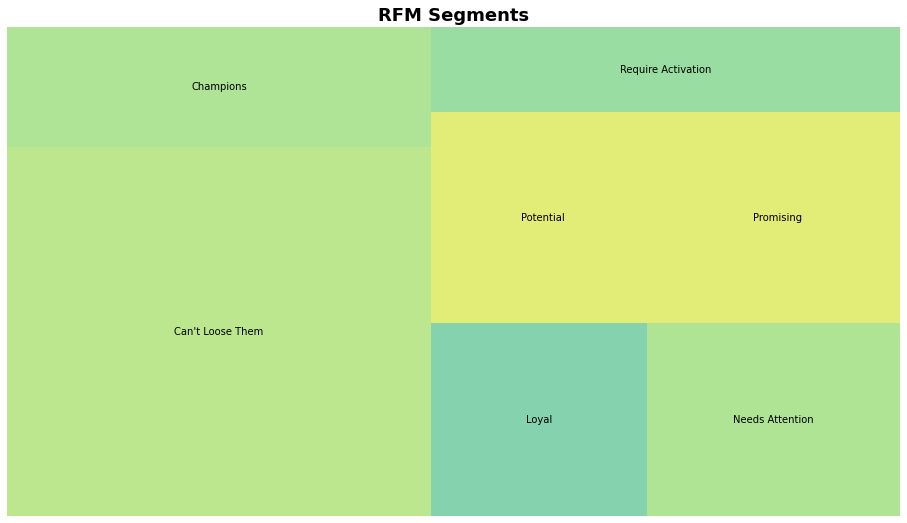

In [170]:
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()